# DATA CLEANING

Importing libraries

In [1]:
import numpy as np            
import pandas as pd

from mlxtend.preprocessing import minmax_scaling

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset

In [2]:
df = pd.read_csv('Dataset.csv',low_memory=False)
df.head()

,Sr No.,Player me,Team Code,Age,Player Height,Player_Weight,country,draft_year,draft_round,draft_number,pts,net_rating
0,0,Travis Knight,LAL,22,213.36,106.59412,USA,1996.0,1.0,29.0,4.8,6.2
1,1,Matt Fish,MIA,27,210.82,106.59412,USA,1992.0,2.0,50.0,0.3,-15.1
2,2,Matt Bullard,HOU,30,208.28,106.59412,USA,NaN,NaN,NaN,4.5,0.9
3,3,Marty Conlon,BOS,29,NaN,111.13004,USA,NaN,NaN,NaN,7.8,-9.0
4,4,Martin Muursepp,DAL,22,205.74,106.59412,USA,1996.0,1.0,25.0,3.7,-14.5


We can see that dataset contains lot of missing data 

In [3]:
shape = df.shape
print(shape)
print("The numer of rows in the dataset are :",shape[0])

(11700, 12)
The numer of rows in the dataset are : 11700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sr No.         11700 non-null  int64  
 1   Player me      11700 non-null  object 
 2   Team Code      11700 non-null  object 
 3   Age            11700 non-null  int64  
 4   Player Height  11677 non-null  float64
 5   Player_Weight  11700 non-null  float64
 6   country        11700 non-null  object 
 7   draft_year     9643 non-null   float64
 8   draft_round    9606 non-null   float64
 9   draft_number   9604 non-null   float64
 10  pts            11700 non-null  float64
 11  net_rating     11700 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Sr No.,Age,Player Height,Player_Weight,draft_year,draft_round,draft_number,pts,net_rating
count,11700.000000,11700.000000,11677.000000,11700.000000,9643.000000,9606.000000,9604.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.726243,100.526791,2002.945245,1.302623,21.783007,8.169299,-2.166410
std,3377.643409,4.340006,9.171012,12.526481,8.482550,0.508263,16.062968,5.956115,12.076914
min,0.000000,18.000000,160.020000,60.327736,1963.000000,0.000000,0.000000,0.000000,-200.000000
25%,2924.750000,24.000000,193.040000,90.718400,1997.000000,1.000000,9.000000,3.600000,-6.300000
50%,5849.500000,26.000000,200.660000,99.790240,2003.000000,1.000000,19.000000,6.700000,-1.300000
75%,8774.250000,30.000000,208.280000,108.862080,2009.000000,2.000000,33.000000,11.500000,3.200000
max,11699.000000,44.000000,231.140000,163.293120,2020.000000,8.000000,165.000000,36.100000,300.000000


We can see different statistical values of all the numerical column

### 1. Missing Values

Checking the null values in each coloumn

In [6]:
missing = df.isna().sum()
missing

Sr No.              0
Player me           0
Team Code           0
Age                 0
Player Height      23
Player_Weight       0
country             0
draft_year       2057
draft_round      2094
draft_number     2096
pts                 0
net_rating          0
dtype: int64

In [7]:
total_cells = shape[0]*shape[1]
missing_values = missing.sum()
missing_percentage = (missing_values/total_cells)*100
print(missing_percentage)

4.465811965811966


4.465% of the values in the dataset are missing or NaN

Filling missing values of column

In [8]:
df.fillna(method='ffill',axis=0,inplace=True)
df.head()

,Sr No.,Player me,Team Code,Age,Player Height,Player_Weight,country,draft_year,draft_round,draft_number,pts,net_rating
0,0,Travis Knight,LAL,22,213.36,106.59412,USA,1996.0,1.0,29.0,4.8,6.2
1,1,Matt Fish,MIA,27,210.82,106.59412,USA,1992.0,2.0,50.0,0.3,-15.1
2,2,Matt Bullard,HOU,30,208.28,106.59412,USA,1992.0,2.0,50.0,4.5,0.9
3,3,Marty Conlon,BOS,29,208.28,111.13004,USA,1992.0,2.0,50.0,7.8,-9.0
4,4,Martin Muursepp,DAL,22,205.74,106.59412,USA,1996.0,1.0,25.0,3.7,-14.5


We can observe that the empty cell have been filled

In [9]:
df.isna().sum()

Sr No.           0
Player me        0
Team Code        0
Age              0
Player Height    0
Player_Weight    0
country          0
draft_year       0
draft_round      0
draft_number     0
pts              0
net_rating       0
dtype: int64

Now there is no missing values in the dataset

### 2. Handling Categorial Data

In [10]:
df.head()

,Sr No.,Player me,Team Code,Age,Player Height,Player_Weight,country,draft_year,draft_round,draft_number,pts,net_rating
0,0,Travis Knight,LAL,22,213.36,106.59412,USA,1996.0,1.0,29.0,4.8,6.2
1,1,Matt Fish,MIA,27,210.82,106.59412,USA,1992.0,2.0,50.0,0.3,-15.1
2,2,Matt Bullard,HOU,30,208.28,106.59412,USA,1992.0,2.0,50.0,4.5,0.9
3,3,Marty Conlon,BOS,29,208.28,111.13004,USA,1992.0,2.0,50.0,7.8,-9.0
4,4,Martin Muursepp,DAL,22,205.74,106.59412,USA,1996.0,1.0,25.0,3.7,-14.5


In [11]:
df.dtypes

Sr No.             int64
Player me         object
Team Code         object
Age                int64
Player Height    float64
Player_Weight    float64
country           object
draft_year       float64
draft_round      float64
draft_number     float64
pts              float64
net_rating       float64
dtype: object

Changing the datatype of Team code and country to categorial data

In [12]:
df = df.astype({'Team Code':'category','country':'category'})
df.dtypes

Sr No.              int64
Player me          object
Team Code        category
Age                 int64
Player Height     float64
Player_Weight     float64
country          category
draft_year        float64
draft_round       float64
draft_number      float64
pts               float64
net_rating        float64
dtype: object

In the dataset, there is no missing categorial data or inconsistent data category.

### 3. Dealing with Inconsistent Data Entry.


In [13]:
df['Team Code'].unique()

[LAL, MIA, HOU, BOS, DAL, ..., CHA, NOK, OKC, BKN, NOP]
Length: 36
Categories (36, object): [LAL, MIA, HOU, BOS, ..., NOK, OKC, BKN, NOP]

In [14]:
df['country'].unique()

[USA, Jamaica, Serbia and Montenegro, Ukraine, Cada, ..., Sudan, Angola, Saint Lucia, Republic of the Congo, Guinea]
Length: 79
Categories (79, object): [USA, Jamaica, Serbia and Montenegro, Ukraine, ..., Angola, Saint Lucia, Republic of the Congo, Guinea]

There is no discrepency or duplicates in the data. Thus, the data is consistent, no change needs to be done.

### 4. Handling Date and Time

In [15]:
df.dtypes

Sr No.              int64
Player me          object
Team Code        category
Age                 int64
Player Height     float64
Player_Weight     float64
country          category
draft_year        float64
draft_round       float64
draft_number      float64
pts               float64
net_rating        float64
dtype: object

There is no column that contains date and time. So there is no need of handling

### 5. Scaling and Normalisation

In [16]:
from mlxtend.preprocessing import minmax_scaling      #for scaling
from scipy import stats                               #for normalisation
df.head()

,Sr No.,Player me,Team Code,Age,Player Height,Player_Weight,country,draft_year,draft_round,draft_number,pts,net_rating
0,0,Travis Knight,LAL,22,213.36,106.59412,USA,1996.0,1.0,29.0,4.8,6.2
1,1,Matt Fish,MIA,27,210.82,106.59412,USA,1992.0,2.0,50.0,0.3,-15.1
2,2,Matt Bullard,HOU,30,208.28,106.59412,USA,1992.0,2.0,50.0,4.5,0.9
3,3,Marty Conlon,BOS,29,208.28,111.13004,USA,1992.0,2.0,50.0,7.8,-9.0
4,4,Martin Muursepp,DAL,22,205.74,106.59412,USA,1996.0,1.0,25.0,3.7,-14.5


Text(0.5, 1.0, 'Scaled data')

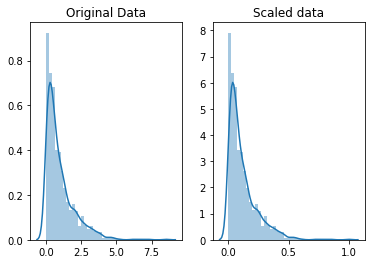

In [17]:
np.random.seed(0)

original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Thus the range of values is converted between 0-1.

# END